In [79]:
import  pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



In [80]:
df = pd.read_csv('customer.csv') # importing the dataset

In [81]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [82]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [83]:
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame and 'column_name' is the name of the column with the missing value
# And assuming 'column_name' is numerical

# Create an imputer object that fills missing values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the column with the missing value
df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df['MINIMUM_PAYMENTS'].values.reshape(-1, 1))
df.dropna(inplace=True)
# df now is your DataFrame with the missing values in 'column_name' filled with the mean value of the column

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df.drop(['CUST_ID'], axis=1, inplace=True)
# Assuming df is your DataFrame and all columns are numeric
# Standardize the features to have mean=0 and variance=1
features = StandardScaler().fit_transform(df)

# Apply PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features)

# Convert array of PCs to a DataFrame
pca_df = pd.DataFrame(data = principalComponents)

# pca_df now is your DataFrame with principal components

In [85]:
pca_df

,0,1
0,-1.682359,-1.076690
1,-1.138964,2.506179
2,0.969374,-0.383476
3,-0.873813,0.042905
4,-1.599680,-0.688729
...,...,...
8944,-0.359267,-2.015698
8945,-0.564018,-1.638698
8946,-0.925784,-1.810448
8947,-2.336209,-0.657753


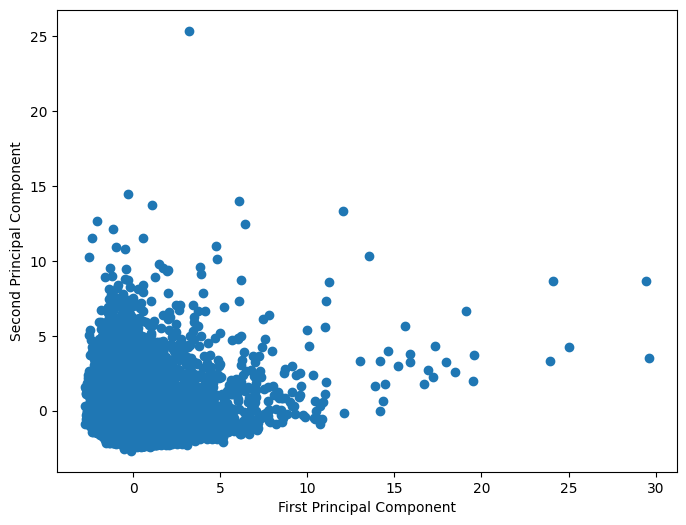

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_df[0], pca_df[1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()